In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/home/m/Documents/DS Bootcamp/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#we have quality column detecting the quality of wine. Let's see what's the maximum value of quality
df['quality'].max()

8

In [5]:
#What's the minimum value of quality
df['quality'].min()

3

<AxesSubplot:>

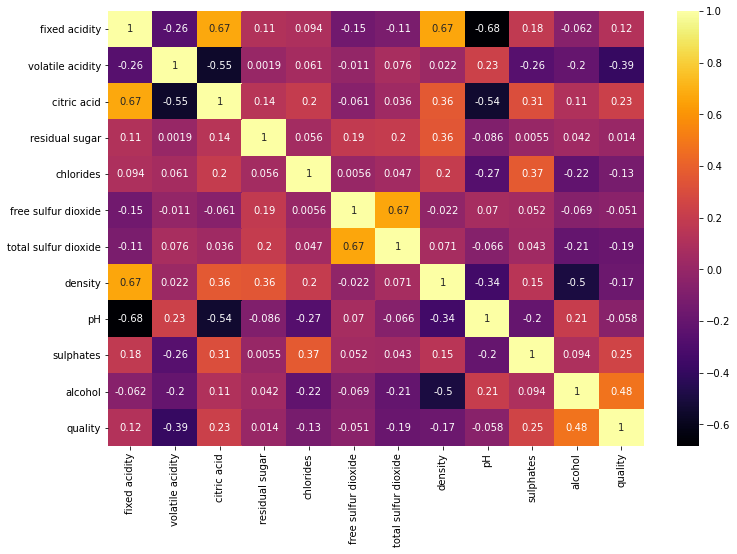

In [6]:
#Let's see what column determines the quality of wine the most
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='inferno', annot= True )

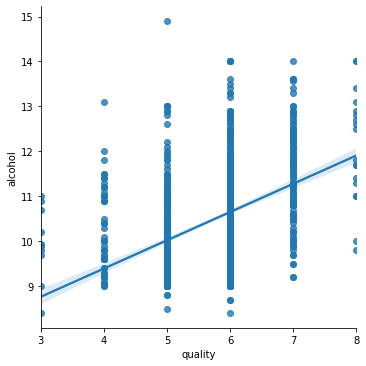

In [7]:
#Alchohol correlates very well with the quality
sns.lmplot(x='quality', y='alcohol', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

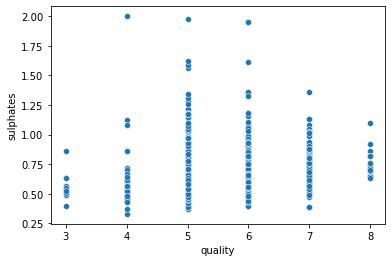

In [8]:
sns.scatterplot(x='quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

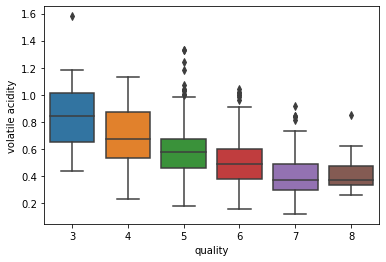

In [9]:
#Volatile acidity as we can see above is inversely proportional to quality. Let's confirm it
sns.boxplot(x='quality', y = 'volatile acidity', data=df)

In [10]:
#Let's convert quality to binary values
#1 if it is 7 or more
#0 if is less than 7
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]

In [36]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

This data set is imbalanced

In [12]:
#Before we use any algorithm, we need to make sure it does not have any null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Standardize the Variables

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('quality', axis=1))

StandardScaler()

In [16]:
scaled_features= scaler.transform(df.drop('quality', axis=1))

In [17]:
df_scal = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [18]:
df_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# Train Test Split

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df_scal
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In [22]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error rate')

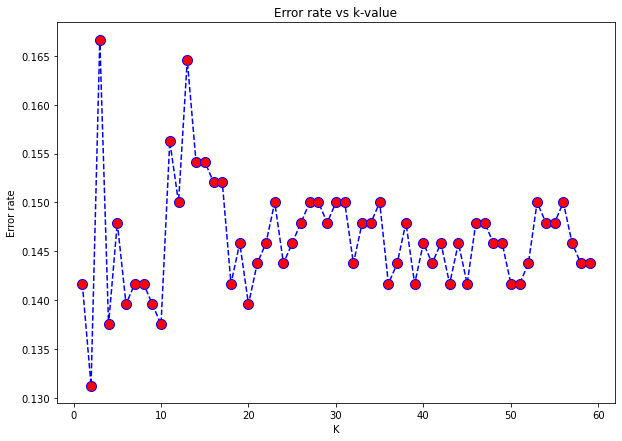

In [23]:
plt.figure(figsize=(10,7))
plt.plot(range(1,60), error_rate, color='blue', ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k-value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [24]:
#We see that error rate is the lowest when k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test) 

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       412
           1       0.50      0.59      0.54        68

    accuracy                           0.86       480
   macro avg       0.72      0.75      0.73       480
weighted avg       0.87      0.86      0.86       480

[[372  40]
 [ 28  40]]


In [ ]:
With macro avg at 0.72 and weighted avg at 0.87, I think we can do better. Let's try some other al

# We can also use SVM to check if the accuracy can go higher

In [26]:
from sklearn.svm import SVC
model = SVC()

In [27]:
X=df_scal
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
model.fit(X_train, y_train)

SVC()

In [29]:
pred_1 = model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       412
           1       0.50      0.59      0.54        68

    accuracy                           0.86       480
   macro avg       0.72      0.75      0.73       480
weighted avg       0.87      0.86      0.86       480

[[372  40]
 [ 28  40]]


We see that accuracy has gone down

# Let us try Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [32]:
X=df_scal
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
pred_2= rfc.predict(X_test)

In [35]:
print(classification_report(y_test, pred_2))
print(confusion_matrix(y_test, pred_2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       412
           1       0.67      0.47      0.55        68

    accuracy                           0.89       480
   macro avg       0.79      0.72      0.75       480
weighted avg       0.88      0.89      0.88       480

[[396  16]
 [ 36  32]]
